In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data to sql

In [3]:
from sqlalchemy import Table,create_engine,Column,Integer,Float,String,DateTime,MetaData

In [5]:
metadata=MetaData()

In [6]:
from datetime import datetime

In [7]:
df1=pd.read_csv('states.csv')

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   State ID  36 non-null     object
 1   State     36 non-null     object
dtypes: object(2)
memory usage: 708.0+ bytes


In [9]:
df2=pd.read_csv('statewise_results.csv')

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Constituency             543 non-null    object
 1   Const. No.               543 non-null    int64 
 2   Parliament Constituency  543 non-null    object
 3   Leading Candidate        543 non-null    object
 4   Trailing Candidate       542 non-null    object
 5   Margin                   543 non-null    int64 
 6   Status                   543 non-null    object
 7   State ID                 543 non-null    object
 8   State                    543 non-null    object
dtypes: int64(2), object(7)
memory usage: 38.3+ KB


In [11]:
df2.head()

,Constituency,Const. No.,Parliament Constituency,Leading Candidate,Trailing Candidate,Margin,Status,State ID,State
0,Surat,24,SURAT(24),MUKESHKUMAR CHANDRAKAANT DALAL,NaN,0,Uncontested,S06,Gujarat
1,INDORE,26,INDORE(26),SHANKAR LALWANI,SANJAY S/O LAKSHMAN SOLANKI,1175092,Result Declared,S12,Himachal Pradesh
2,Dhubri,2,DHUBRI(2),RAKIBUL HUSSAIN,MOHAMMED BADRUDDIN AJMAL,1012476,Result Declared,S03,Assam
3,VIDISHA,18,VIDISHA(18),SHIVRAJ SINGH CHOUHAN,PRATAPBHANU SHARMA,821408,Result Declared,S12,Himachal Pradesh
4,Navsari,25,NAVSARI(25),C R PATIL,NAISHADHBHAI BHUPATBHAI DESAI,773551,Result Declared,S06,Gujarat


In [12]:
df3=pd.read_csv('partywise_results.csv')

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Party     42 non-null     object
 1   Won       42 non-null     int64 
 2   Party ID  42 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [14]:
df4=pd.read_csv('constituencywise_details.csv')

In [15]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S.N.             8902 non-null   int64  
 1   Candidate        8902 non-null   object 
 2   Party            8902 non-null   object 
 3   EVM Votes        8902 non-null   int64  
 4   Postal Votes     8902 non-null   int64  
 5   Total Votes      8902 non-null   int64  
 6   % of Votes       8902 non-null   float64
 7   Constituency ID  8902 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 556.5+ KB


In [16]:
df5=pd.read_csv('constituencywise_results.csv')

In [17]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   S.No                     543 non-null    int64 
 1   Parliament Constituency  543 non-null    object
 2   Constituency Name        543 non-null    object
 3   Winning Candidate        543 non-null    object
 4   Total Votes              543 non-null    int64 
 5   Margin                   543 non-null    int64 
 6   Constituency ID          543 non-null    object
 7   Party ID                 543 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 34.1+ KB


In [18]:
df1.head()

,State ID,State
0,U01,Andaman & Nicobar Islands
1,S01,Andhra Pradesh
2,S02,Arunachal Pradesh
3,S03,Assam
4,S04,Bihar


In [19]:
tables = {
    "States": Table(
        "States",
        metadata,
        Column('State ID', String),
        Column('State', String)
    ),
    "statewise_results": Table(
        "statewise_results",
        metadata,
        Column('Constituency', String),
        Column('Const. No.', Integer),
        Column('Parliament Constituency', String),
        Column('Leading Candidate', String),
        Column('Trailing Candidate', String, nullable=True),  # Can be null
        Column('Margin', Integer),
        Column('Status', String),
        Column('State ID', String),
        Column('State', String)
    ),
    "partywise_results": Table(
        "partywise_results",
        metadata,
        Column('Party', String),
        Column('Won', Integer),
        Column('Party ID', Integer)
    ),
    "constituencywise_details": Table(
        "constituencywise_details",
        metadata,
        Column('S.N.', Integer),
        Column('Candidate', String),
        Column('Party', String),
        Column('EVM Votes', Integer),
        Column('Postal Votes', Integer),
        Column('Total Votes', Integer),
        Column('% of Votes', Float),
        Column('Constituency ID', String)
    ),
    "constituencywise_results": Table(
        "constituencywise_results",
        metadata,
        Column('S.No', Integer),
        Column('Parliament Constituency', String),
        Column('Constituency Name', String),
        Column('Winning Candidate', String),
        Column('Total Votes', Integer),
        Column('Margin', Integer),
        Column('Constituency ID', String),
        Column('Party ID', Integer)
    )
}

In [20]:
db_type='postgresql'
database='Election'
username='postgres'
password='sonu1203#'
host='localhost'

In [21]:
drivers={
    'postgresql':'psycopg2',
    'mysql':'mysqlconnector'
}

In [22]:
connection_string = f"{db_type}+{drivers[db_type]}://{username}:{password}@{host}:5432/Election"


In [23]:
engine=create_engine(connection_string)

In [24]:
metadata.create_all(engine)

In [25]:
with engine.connect() as connection:
    df1.to_sql('States',con=connection,if_exists="append",index=False),
    df2.to_sql('statewise_results', con=connection, if_exists="append", index=False)
    df3.to_sql('partywise_results', con=connection, if_exists="append", index=False)
    df4.to_sql('constituencywise_details', con=connection, if_exists="append", index=False)
    df5.to_sql('constituencywise_results', con=connection, if_exists="append", index=False)


# Data analyzing and visualizing

# Q 1] Total seats ?

In [28]:
query='select count(distinct "Constituency ID") as total_seats from  constituency_wise_results;'
total=pd.read_sql(query,engine)

In [29]:
print("total seats:",total)

total seats:    total_seats
0          543


# Q2] what are the total no of seats available for election in each state;

In [31]:
query='''SELECT 
    "States"."State" AS statename,
    COUNT(distinct "statewise_results"."Parliament Constituency") AS total_constituencies
FROM 
    "States"
JOIN 
    "statewise_results"
ON 
    "States"."State ID" = "statewise_results"."State ID"
GROUP BY 
    "States"."State"
ORDER BY 
    total_constituencies DESC;'''
total=pd.read_sql(query,engine)

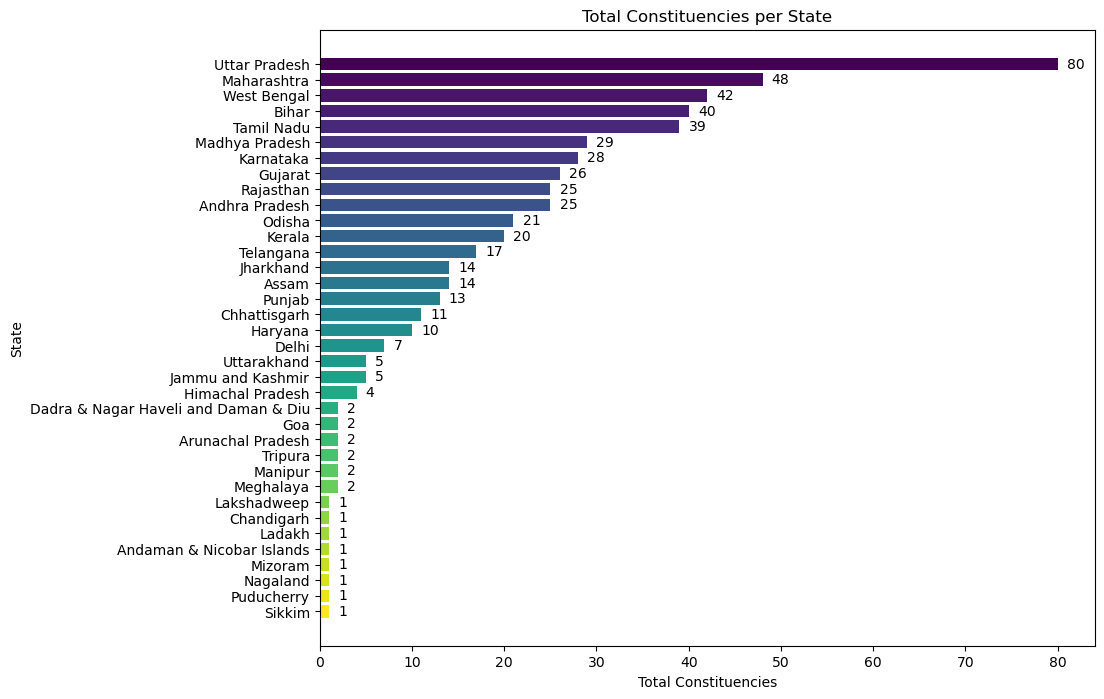

In [32]:
total = total.sort_values('total_constituencies', ascending=False)


colors = plt.cm.viridis(np.linspace(0, 1, len(total)))

plt.figure(figsize=(10, 8))
bars = plt.barh(total['statename'], total['total_constituencies'], color=colors)


for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width()}', va='center', ha='left', color='black', fontsize=10)

plt.xlabel('Total Constituencies')
plt.ylabel('State')
plt.title('Total Constituencies per State')
plt.gca().invert_yaxis()  
plt.show()

# as you see in above diagram that utterpradesh has most seats 80

 # Q3] Total seats won by NDA Alliance?

In [35]:
query='''SELECT DISTINCT ON ("Party") *
FROM "partywise_results"
WHERE "alliance" = 'NDA'
ORDER BY "Party", "Party ID";'''
total=pd.read_sql(query,engine)

C:\Users\hp\AppData\Local\Temp\ipykernel_19680\3416820662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y='Won', data=total, palette='tab20')


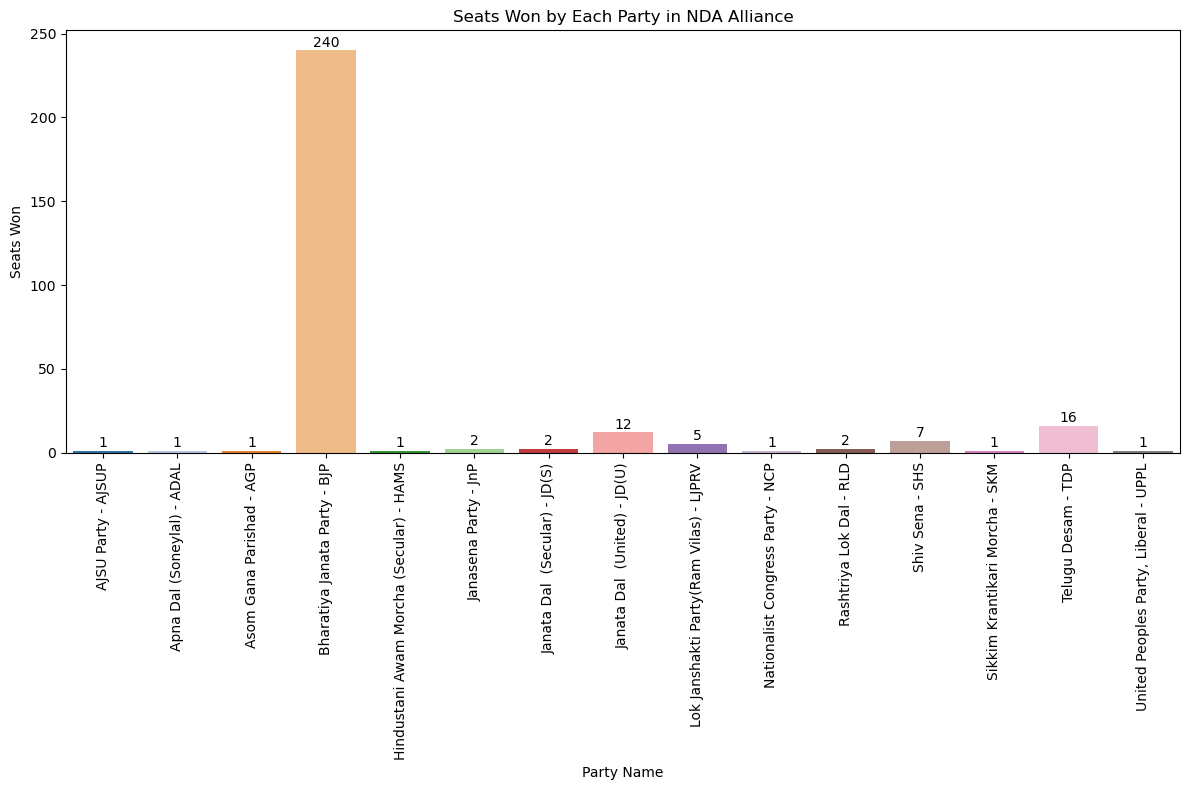

In [36]:
plt.figure(figsize=(12, 8))

# Create a bar plot with different colors for each party
sns.barplot(x='Party', y='Won', data=total, palette='tab20')

# Add value labels on top of each bar
for index, value in enumerate(total['Won']):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Party Name')
plt.ylabel('Seats Won')
plt.title('Seats Won by Each Party in NDA Alliance')

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
query='''SELECT "alliance", SUM("Won") AS "seats_won"
FROM (
    SELECT DISTINCT "Party", "Won", "alliance"
    FROM "partywise_results"
    WHERE "alliance" = 'NDA'
) AS distinct_parties
GROUP BY "alliance";
'''
total=pd.read_sql(query,engine)

# total seats won by NDA allinces

In [39]:
total

,alliance,seats_won
0,NDA,293


 # Q4] Total seats won by INDIA Alliance?

In [41]:
query='''SELECT DISTINCT ON ("Party") *
FROM "partywise_results"
WHERE "alliance" = 'INDIA'
ORDER BY "Party", "Party ID";'''
total=pd.read_sql(query,engine)

C:\Users\hp\AppData\Local\Temp\ipykernel_19680\2723498198.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y='Won', data=total, palette='tab20')


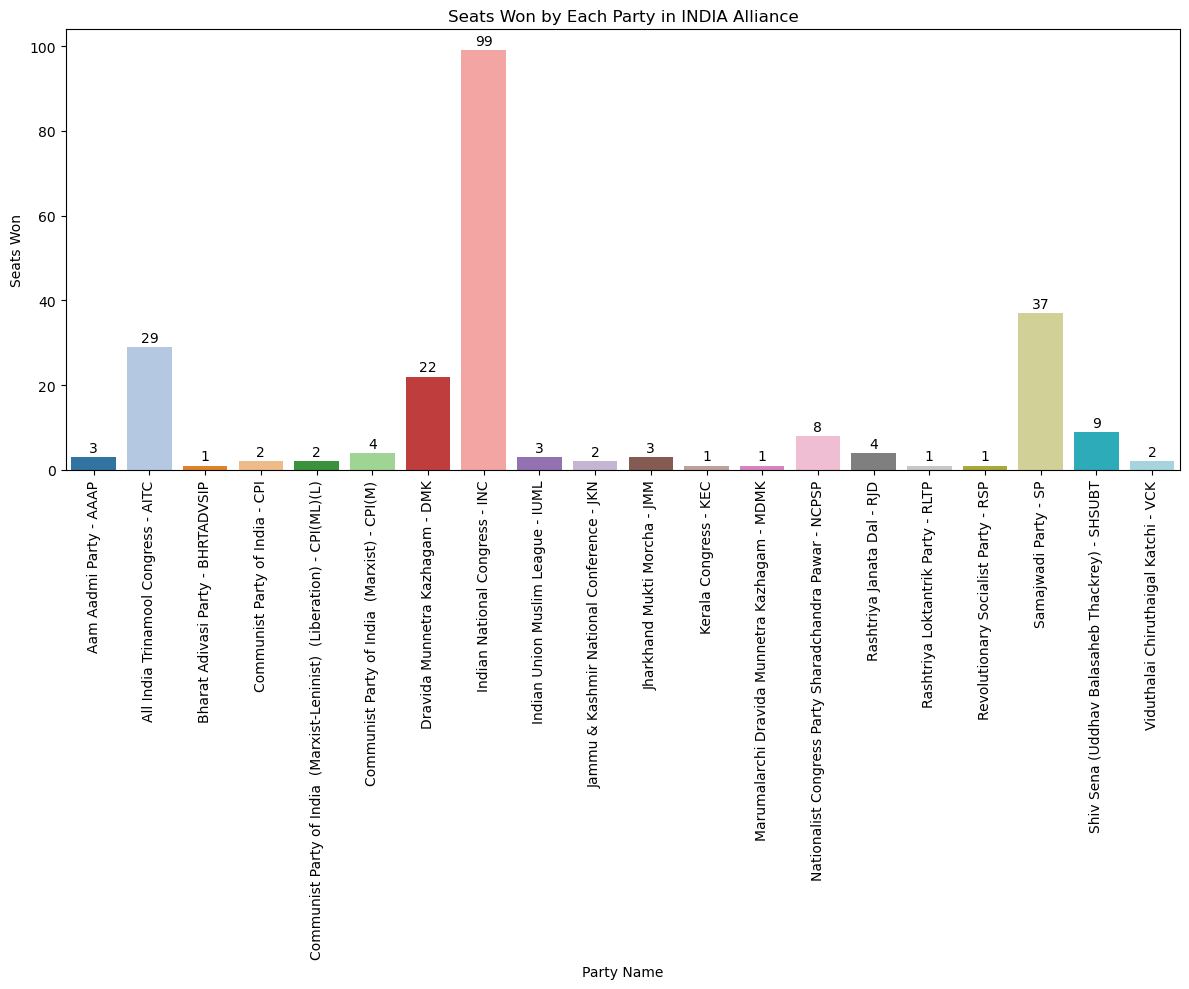

In [42]:
plt.figure(figsize=(12, 10))

# Create a bar plot with different colors for each party
sns.barplot(x='Party', y='Won', data=total, palette='tab20')

# Add value labels on top of each bar
for index, value in enumerate(total['Won']):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Party Name')
plt.ylabel('Seats Won')
plt.title('Seats Won by Each Party in INDIA Alliance')

# Show the plot
plt.tight_layout()
plt.show()

In [43]:
query='''SELECT "alliance", SUM("Won") AS "seats_won"
FROM (
    SELECT DISTINCT "Party", "Won", "alliance"
    FROM "partywise_results"
    WHERE "alliance" = 'INDIA'
) AS distinct_parties
GROUP BY "alliance";'''
total=pd.read_sql(query,engine)

# total seats won by india allinces

In [45]:
total

,alliance,seats_won
0,INDIA,234


 # Q5] Total seats won by Independent/others?

In [47]:
query='''SELECT "alliance", SUM("Won") AS "seats_won"
FROM (
    SELECT DISTINCT "Party", "Won", "alliance"
    FROM "partywise_results"
    WHERE "alliance" NOT IN ('INDIA', 'NDA')
) AS distinct_parties
GROUP BY "alliance";'''
total=pd.read_sql(query,engine)

# total seats won by independent/others

In [49]:
total

,alliance,seats_won
0,Other,16


# -Q 6] select party which won most seats ?


In [51]:
query='''SELECT "Party", "Won" 
FROM "partywise_results" 
ORDER BY "Won" DESC 
LIMIT 1;
'''
total=pd.read_sql(query,engine)

In [52]:
total

,Party,Won
0,Bharatiya Janata Party - BJP,240


 # Q7]seats won by different  different alliance ?


In [54]:
query='''SELECT "alliance", SUM("Won") AS total_seats
FROM (
    SELECT DISTINCT "Party", "Won", "alliance"
    FROM "partywise_results"
    WHERE "Party" IS NOT NULL AND "Won" IS NOT NULL AND "alliance" IS NOT NULL
) AS distinct_parties
GROUP BY "alliance"
ORDER BY total_seats DESC;
'''
total=pd.read_sql(query,engine)

In [55]:
total

,alliance,total_seats
0,NDA,293
1,INDIA,234
2,Other,16


C:\Users\hp\AppData\Local\Temp\ipykernel_19680\1266089755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='alliance', y='total_seats', data=total, palette='viridis')


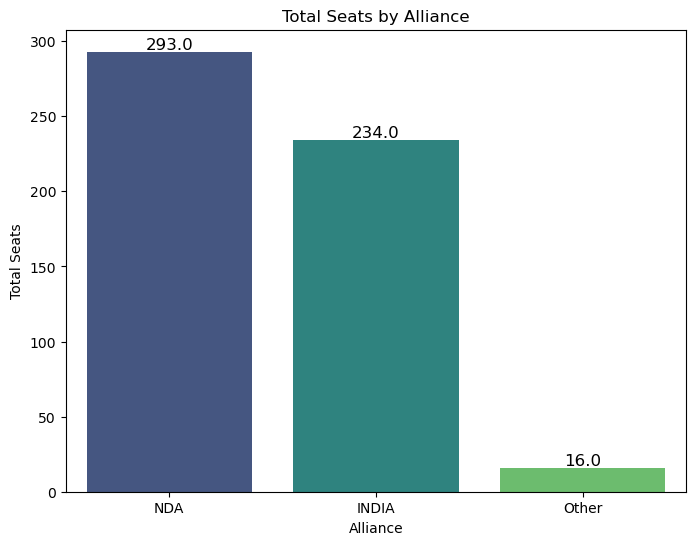

In [56]:

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='alliance', y='total_seats', data=total, palette='viridis')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')


plt.xlabel('Alliance')
plt.ylabel('Total Seats')
plt.title('Total Seats by Alliance')


plt.show()

# Q 8] winning candidate name,theire party_name and winning margine for specific state and constituency?


In [58]:
query='''SELECT DISTINCT
    "constituencywise_results"."Constituency Name", 
    "constituencywise_results"."Winning Candidate", 
    "partywise_results"."Party", 
    "constituencywise_results"."Margin", 
    "States"."State"
FROM 
    "constituencywise_results"
JOIN 
    "partywise_results" 
    ON "constituencywise_results"."Party ID" = "partywise_results"."Party ID"
JOIN 
    "statewise_results" 
    ON "constituencywise_results"."Parliament Constituency" = "statewise_results"."Parliament Constituency"
JOIN 
    "States" 
    ON "statewise_results"."State ID" = "States"."State ID"
WHERE 
    "States"."State" = 'Maharashtra'
    AND "constituencywise_results"."Constituency Name" = 'BARAMATI';


'''
total=pd.read_sql(query,engine)

In [59]:
total

,Constituency Name,Winning Candidate,Party,Margin,State
0,BARAMATI,SUPRIYA SULE,Nationalist Congress Party Sharadchandra Pawar...,158333,Maharashtra


In [60]:
# this is one eg thatwinning candidate name,theire party_name and winning margine for specific state and constituency

# Q ]9  what is distibution of evm ,postal and total votes for candidates in specific constituency;

In [62]:
query='''
   
SELECT DISTINCT 
    "constituencywise_results"."Constituency Name",
    "constituencywise_details"."Candidate",
    "constituencywise_details"."EVM Votes",
    "constituencywise_details"."Postal Votes",
    "constituencywise_details"."Total Votes"
FROM 
    "constituencywise_results"
JOIN 
    "constituencywise_details" 
    ON "constituencywise_details"."Constituency ID" = "constituencywise_results"."Constituency ID"
WHERE 
    "constituencywise_results"."Constituency Name" = 'BARAMATI'
ORDER BY 
    "constituencywise_details"."Total Votes" DESC;


'''
total=pd.read_sql(query,engine)

In [63]:
total

,Constituency Name,Candidate,EVM Votes,Postal Votes,Total Votes
0,BARAMATI,SUPRIYA SULE,731400,912,732312
1,BARAMATI,SUNETRA AJITDADA PAWAR,573391,588,573979
2,BARAMATI,MAHESH SITARAM BHAGWAT,15620,43,15663
3,BARAMATI,SHAIKH SOYALSHAHA YUNUSSHAHA,14913,4,14917
4,BARAMATI,PRIYADARSHANI NANDKUMAR KOKARE,9995,35,10030
5,BARAMATI,NOTA,9130,21,9151
6,BARAMATI,SACHIN SHANKAR AGAWANE,6633,0,6633
7,BARAMATI,KAMBLE TRISHALA,5032,4,5036
8,BARAMATI,SUNITA PAWAR,4150,1,4151
9,BARAMATI,GAJANAN UTTAM GAWALI (PATIL),2991,4,2995


# Q 10} which party won most seats in state and how many seats did each party win for specific state;


In [65]:
query='''
   
SELECT 
    "partywise_results"."Party",
    COUNT(distinct"constituencywise_results"."Constituency ID") AS "won_seats"
FROM 
    "partywise_results"
JOIN 
    "constituencywise_results" 
    ON "partywise_results"."Party ID" = "constituencywise_results"."Party ID"
JOIN 
    "statewise_results" 
    ON "constituencywise_results"."Parliament Constituency" = "statewise_results"."Parliament Constituency"
JOIN 
    "States" 
    ON "statewise_results"."State ID" = "States"."State ID"
WHERE 
    "States"."State" = 'Maharashtra'
GROUP BY 
    "partywise_results"."Party"
ORDER BY 
    "won_seats" DESC;




'''
total=pd.read_sql(query,engine)

In [66]:
total

,Party,won_seats
0,Indian National Congress - INC,13
1,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9
2,Bharatiya Janata Party - BJP,9
3,Nationalist Congress Party Sharadchandra Pawar...,8
4,Shiv Sena - SHS,7
5,Nationalist Congress Party - NCP,1
6,Independent - IND,1



for maharastra state

# Q 11]total seats won by each party of(alliance) (nda,india,other) in each state for 2024 election;


In [69]:
SELECT
    "States"."State",
    "partywise_results"."alliance",
    COUNT(DISTINCT "constituencywise_results"."Constituency ID") AS "won_seats"
FROM
    "partywise_results"
JOIN
    "constituencywise_results" 
    ON "partywise_results"."Party ID" = "constituencywise_results"."Party ID"
JOIN
    "statewise_results" 
    ON "constituencywise_results"."Parliament Constituency" = "statewise_results"."Parliament Constituency"
JOIN
    "States" 
    ON "statewise_results"."State ID" = "States"."State ID"
WHERE
    "States"."State" = 'Maharashtra'
    AND "partywise_results"."alliance" IS NOT NULL
GROUP BY
    "States"."State", "partywise_results"."alliance"
ORDER BY
    "won_seats" DESC;

IndentationError: unexpected indent (2713587925.py, line 2)

In [ ]:
query='''
SELECT
    "States"."State",
    "partywise_results"."alliance",
    COUNT(DISTINCT "constituencywise_results"."Constituency ID") AS "won_seats"
FROM
    "partywise_results"
JOIN
    "constituencywise_results" 
    ON "partywise_results"."Party ID" = "constituencywise_results"."Party ID"
JOIN
    "statewise_results" 
    ON "constituencywise_results"."Parliament Constituency" = "statewise_results"."Parliament Constituency"
JOIN
    "States" 
    ON "statewise_results"."State ID" = "States"."State ID"
WHERE
    "States"."State" = 'Maharashtra'
    AND "partywise_results"."alliance" IS NOT NULL
GROUP BY
    "States"."State", "partywise_results"."alliance"
ORDER BY
    "won_seats" DESC;

'''
total=pd.read_sql(query,engine)





In [ ]:
total

# Q13] which candidate  received the highest number of evmvotes in each constituency;

In [ ]:
query='''
SELECT 
    "constituencywise_details"."Candidate", 
    MAX("constituencywise_details"."EVM Votes") AS "EVM Votes"
FROM 
    "constituencywise_details"
GROUP BY 
    "constituencywise_details"."Candidate"
ORDER BY 
    "EVM Votes" DESC
LIMIT 5;
'''
total=pd.read_sql(query,engine)





In [ ]:
total

In [ ]:

plt.figure(figsize=(10,6))
bar_plot = sns.barplot(x='EVM Votes', y='Candidate', data=total, palette='viridis')

for index, value in enumerate(total['EVM Votes']):
    bar_plot.text(value + 50000, index, f'{value:,}', va='center', fontweight='bold')

plt.title('Top 5 Candidates with the Most EVM Votes', fontsize=16)
plt.xlabel('EVM Votes', fontsize=14)
plt.ylabel('Candidate', fontsize=14)


plt.show()

 # Q 14] which candidate won and which candidate is runner up in each constituency of  state for 2024 election;


In [ ]:
query='''

SELECT 
    "statewise_results"."Constituency", 
    "statewise_results"."Leading Candidate" AS "winning_candidate", 
    "statewise_results"."Trailing Candidate" AS "runnerup_candidate"
FROM 
    "statewise_results"
LIMIT 10;
'''
total=pd.read_sql(query,engine)





In [ ]:
total

# Q15] FOR  STATE MAHARASTA WHAT ARE TOTAL NUMBER OF SEATS ,TOTAL_NUMBER OF CANDIDATE ,TOTAL NUMBER OF PARTIES, TOTAL VOTES INCLUDING EVM,POSTAL AND BREAK DOWN OF POSTAL AND EVM VOTE;

In [ ]:
query='''

SELECT 
    "States"."State" AS "state_name",
    COUNT(DISTINCT "statewise_results"."Constituency") AS "total_constituencies",
    COUNT(DISTINCT "constituencywise_details"."Candidate") AS "total_candidates",
    COUNT(DISTINCT "constituencywise_details"."Party") AS "total_parties",
    SUM("constituencywise_details"."Total Votes") AS "total_votes",
    SUM("constituencywise_details"."EVM Votes") AS "total_evm_votes",
    SUM("constituencywise_details"."Postal Votes") AS "total_postal_votes"
FROM 
    "States"
JOIN 
    "statewise_results" ON "States"."State ID" = "statewise_results"."State ID"
JOIN 
    "constituencywise_results" ON "statewise_results"."Parliament Constituency" = "constituencywise_results"."Parliament Constituency"
JOIN 
    "constituencywise_details" ON "constituencywise_results"."Constituency ID" = "constituencywise_details"."Constituency ID"
WHERE 
    "States"."State" = 'Maharashtra'
GROUP BY 
    "States"."State";

'''
total=pd.read_sql(query,engine)





In [ ]:
total